# Лабораторна робоат № 4. ІП-14 Бабіч Денис

## Підготовчий етап

### Імпортування необхідних модулів

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

### Створення допоміжних функцій

In [14]:
def rename_column(dataframe: pd.DataFrame, old_column_name: str, new_column_name: str) -> None:
    if old_column_name in dataframe.columns:
        dataframe = dataframe.rename(columns = {old_column_name: new_column_name}, inplace = True)


def convert_column(dataframe: pd.DataFrame, column_name: str, data_type: type) -> None:
    if column_name in dataframe.columns:
        dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors = "coerce")
        dataframe[column_name] = dataframe[column_name].apply(lambda x: None if pd.isna(x) or np.isinf(x) else x)
        dataframe[column_name] = dataframe[column_name].astype(data_type, errors = "ignore")


def build_confusion_matrix(model: any, x_test: list, y_test: list) -> None:
    plt.figure(figsize = (8, 5))
    sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot = True, fmt = ".1f")
    plt.xlabel("Передбачені значення")


def build_roc_plot(model: any, x_test: list, y_test: list):
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label = f"Area = {str(auc)}")
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc = 4)
    plt.show()


#def build_tree_visualization():

### Заповнення датафрейму

In [3]:
#1. loc              : numeric % McCabe's line count of code
#2. v(g)             : numeric % McCabe "cyclomatic complexity"
#3. ev(g)            : numeric % McCabe "essential complexity"
#4. iv(g)            : numeric % McCabe "design complexity"
#5. n                : numeric % Halstead total operators + operands
#6. v                : numeric % Halstead "volume"
#7. l                : numeric % Halstead "program length"
#8. d                : numeric % Halstead "difficulty"
#9. i                : numeric % Halstead "intelligence"
#10. e               : numeric % Halstead "effort"
#11. b               : numeric % Halstead 
#12. t               : numeric % Halstead's time estimator
#13. lOCode          : numeric % Halstead's line count
#14. lOComment       : numeric % Halstead's count of lines of comments
#15. lOBlank         : numeric % Halstead's count of blank lines
#16. lOCodeAndComment: numeric
#17. uniq_Op         : numeric % unique operators
#18. uniq_Opnd       : numeric % unique operands
#19. total_Op        : numeric % total operators
#20. total_Opnd      : numeric % total operands
#21: branchCount     : numeric % of the flow graph
#22. defects         : {false,true} % module has/has not one or more % reported defects

software_defects_data = pd.read_csv("SoftwareDefects.csv", sep = ',', encoding = "utf-8")

rename_column(software_defects_data, "loc", "McCabe's lines count")
convert_column(software_defects_data, "McCabe's lines count", int)

rename_column(software_defects_data, "v(g)", "McCabe's cyclomatic complexity")
convert_column(software_defects_data, "McCabe's cyclomatic complexity", int)

rename_column(software_defects_data, "ev(g)", "McCabe's essential complexity")
convert_column(software_defects_data, "McCabe's essential complexity", int)

rename_column(software_defects_data, "iv(g)", "McCabe's design complexity")
convert_column(software_defects_data, "McCabe's design complexity", int)

rename_column(software_defects_data, "n", "Halstead's total operators and operands")
convert_column(software_defects_data, "Halstead's total operators and operands", int)

rename_column(software_defects_data, "v", "Halstead's volume")
convert_column(software_defects_data, "Halstead's volume", float)

rename_column(software_defects_data, "l", "Halstead's program length")
convert_column(software_defects_data, "Halstead's program length", float)

rename_column(software_defects_data, "d", "Halstead's difficulty")
convert_column(software_defects_data, "Halstead's difficulty", float)

rename_column(software_defects_data, "i", "Halstead's intelligence")
convert_column(software_defects_data, "Halstead's intelligence", float)

rename_column(software_defects_data, "e", "Halstead's effort")
convert_column(software_defects_data, "Halstead's effort", float)

rename_column(software_defects_data, "b", "Halstead's Total")
convert_column(software_defects_data, "Halstead's Total", float)

rename_column(software_defects_data, "t", "Halstead's Time estimator")
convert_column(software_defects_data, "Halstead's Time estimator", float)

rename_column(software_defects_data, "lOCode", "Halstead's lines count")
convert_column(software_defects_data, "Halstead's lines count", int)

rename_column(software_defects_data, "lOComment", "Halstead's comments count")
convert_column(software_defects_data, "Halstead's comments count", int)

rename_column(software_defects_data, "lOBlank", "Halstead's blank lines count")
convert_column(software_defects_data, "Halstead's blank lines count", int)

rename_column(software_defects_data, "locCodeAndComment", "Halstead's total lines")
convert_column(software_defects_data, "Halstead's total lines", int)

rename_column(software_defects_data, "uniq_Op", "Unique operators")
convert_column(software_defects_data, "Unique operators", int)

rename_column(software_defects_data, "uniq_Opnd", "Unique operands")
convert_column(software_defects_data, "Unique operands", int)

rename_column(software_defects_data, "total_Op", "Total operators")
convert_column(software_defects_data, "Total operators", int)

rename_column(software_defects_data, "total_Opnd", "Total operands")
convert_column(software_defects_data, "Total operands", int)

rename_column(software_defects_data, "branchCount", "Number of branches")
convert_column(software_defects_data, "Number of branches", int)

rename_column(software_defects_data, "defects", "Defects")
convert_column(software_defects_data, "Defects", int)

software_defects_data.replace('?', np.nan, inplace = True)
software_defects_data.dropna(axis = 0, how = "any", inplace = True)

software_defects_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   McCabe's lines count                     10880 non-null  int32  
 1   McCabe's cyclomatic complexity           10880 non-null  int32  
 2   McCabe's essential complexity            10880 non-null  int32  
 3   McCabe's design complexity               10880 non-null  int32  
 4   Halstead's total operators and operands  10880 non-null  int32  
 5   Halstead's volume                        10880 non-null  float64
 6   Halstead's program length                10880 non-null  float64
 7   Halstead's difficulty                    10880 non-null  float64
 8   Halstead's intelligence                  10880 non-null  float64
 9   Halstead's effort                        10880 non-null  float64
 10  Halstead's Total                         10880

## Основний етап

### Побудова візуалізацій

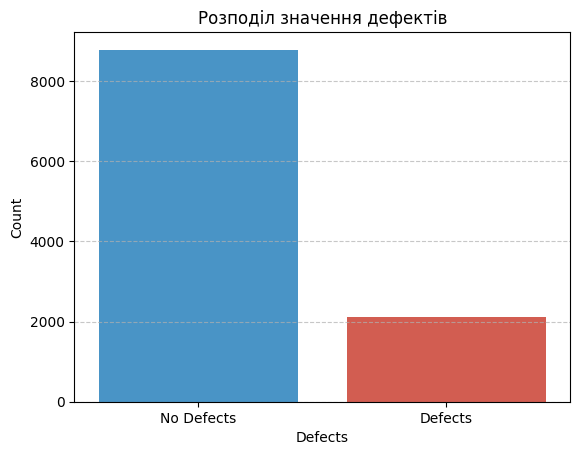

In [4]:
sns.barplot(x = ["No Defects", "Defects"], y = software_defects_data["Defects"].value_counts(), palette = ["#3498db", "#e74c3c"])
plt.grid(axis = 'y', linestyle = "--", alpha = 0.7)
plt.xlabel("Defects")
plt.ylabel("Count")
plt.title("Розподіл значення дефектів")
plt.show()

### Кореляція між факторами

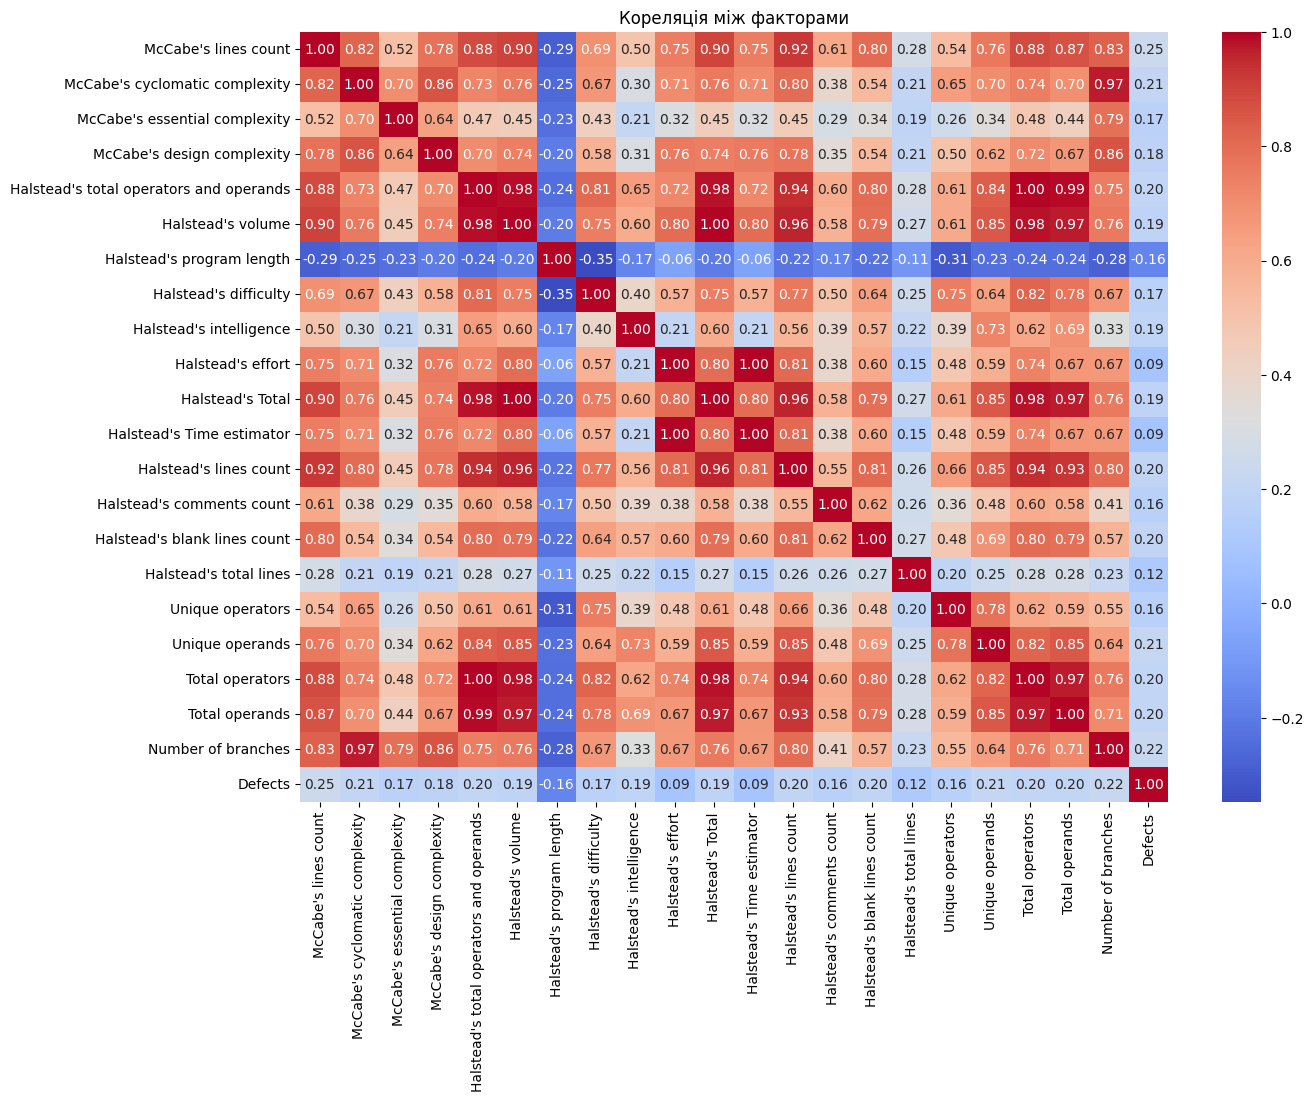

In [7]:
plt.figure(figsize = (14, 10))
sns.heatmap(software_defects_data.corr(), annot = True, cmap = "coolwarm", fmt = '.2f')
plt.title("Кореляція між факторами")
plt.show()

### Побудова аналітичного рішення

#### Підготовка даних

In [10]:
x = software_defects_data.drop(columns = ["Halstead's program length", "Defects"], axis = 1)
y = software_defects_data["Defects"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 0)
results = list()

#### Decision Tree Classifier

In [12]:
decision_tree_classifier = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)

train_score = round(decision_tree_classifier.score(x_train, y_train), 5)
test_score = round(decision_tree_classifier.score(x_test, y_test), 5)
results.append({"Model": "Decision Tree\nClassifier", "R^2 Score": train_score, "Type": "Train"})
results.append({"Model": "Decision Tree\nClassifier", "R^2 Score": test_score, "Type": "Test"})

visualize_decision_tree(decision_tree_classifier, features, class_names)
build_confusion_matrix(decision_tree_classifier, x_test, y_test)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

#### Gradient Boosting Classifier

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
<class 'list'>
<class 'list'>


AttributeError: 'GradientBoostingClassifier' object has no attribute 'tree_'

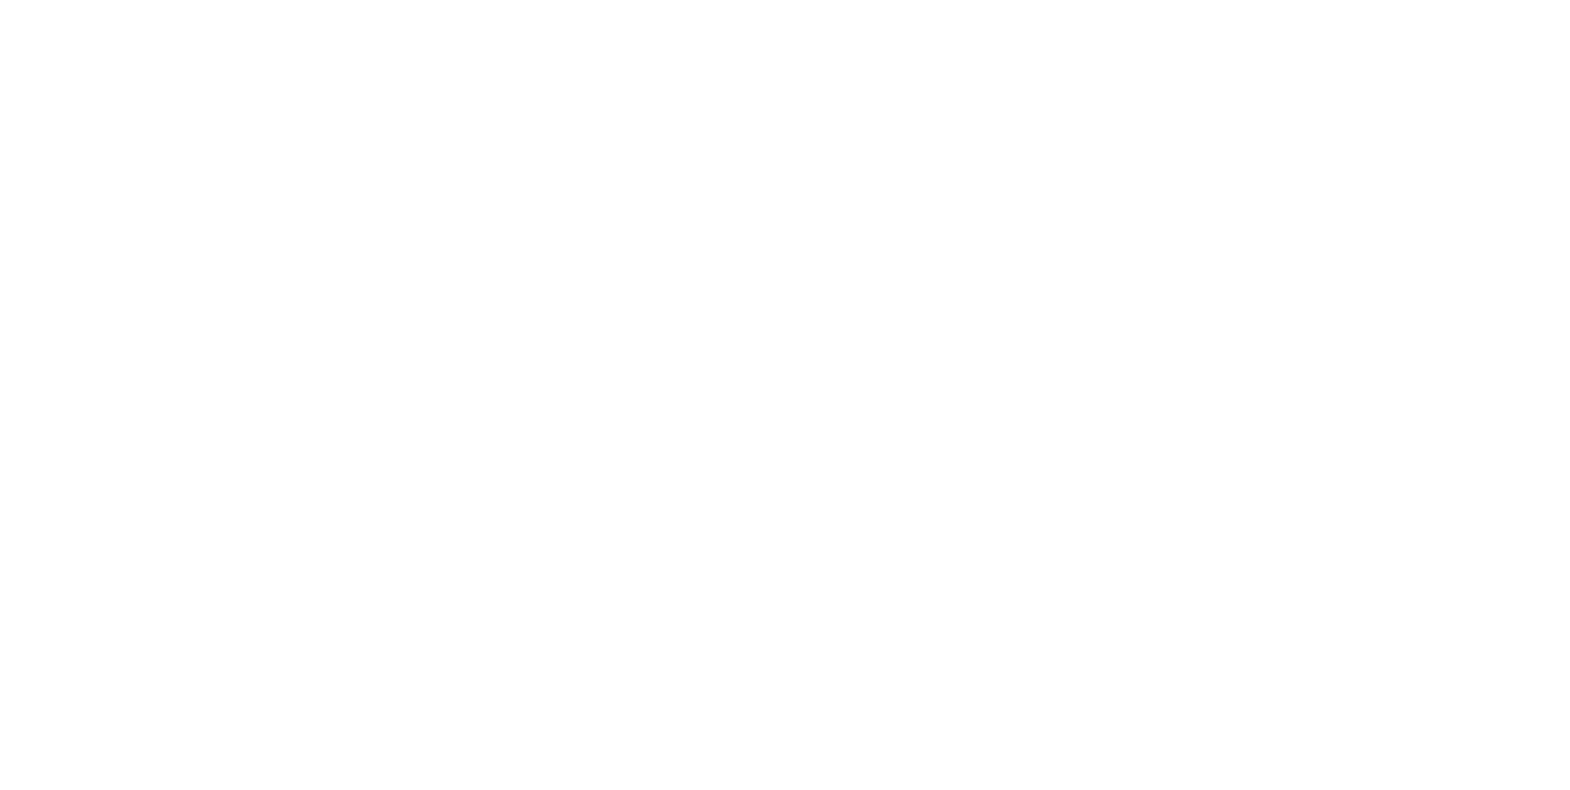

In [81]:
gradient_boosting_classifier = GradientBoostingClassifier(max_depth = 3).fit(x_train, y_train)

train_score = round(gradient_boosting_classifier.score(x_train, y_train), 5)
test_score = round(gradient_boosting_classifier.score(x_test, y_test), 5)
results.append({"Model": "Gradient Boosting\nClassifier", "R^2 Score": train_score, "Type": "Train"})
results.append({"Model": "Gradient Boosting\nClassifier", "R^2 Score": test_score, "Type": "Test"})

visualize_decision_tree(gradient_boosting_classifier, features, class_names)
build_confusion_matrix(gradient_boosting_classifier, x_test, y_test)

#### Random Forest Classifier

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'list'>
<class 'list'>


AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

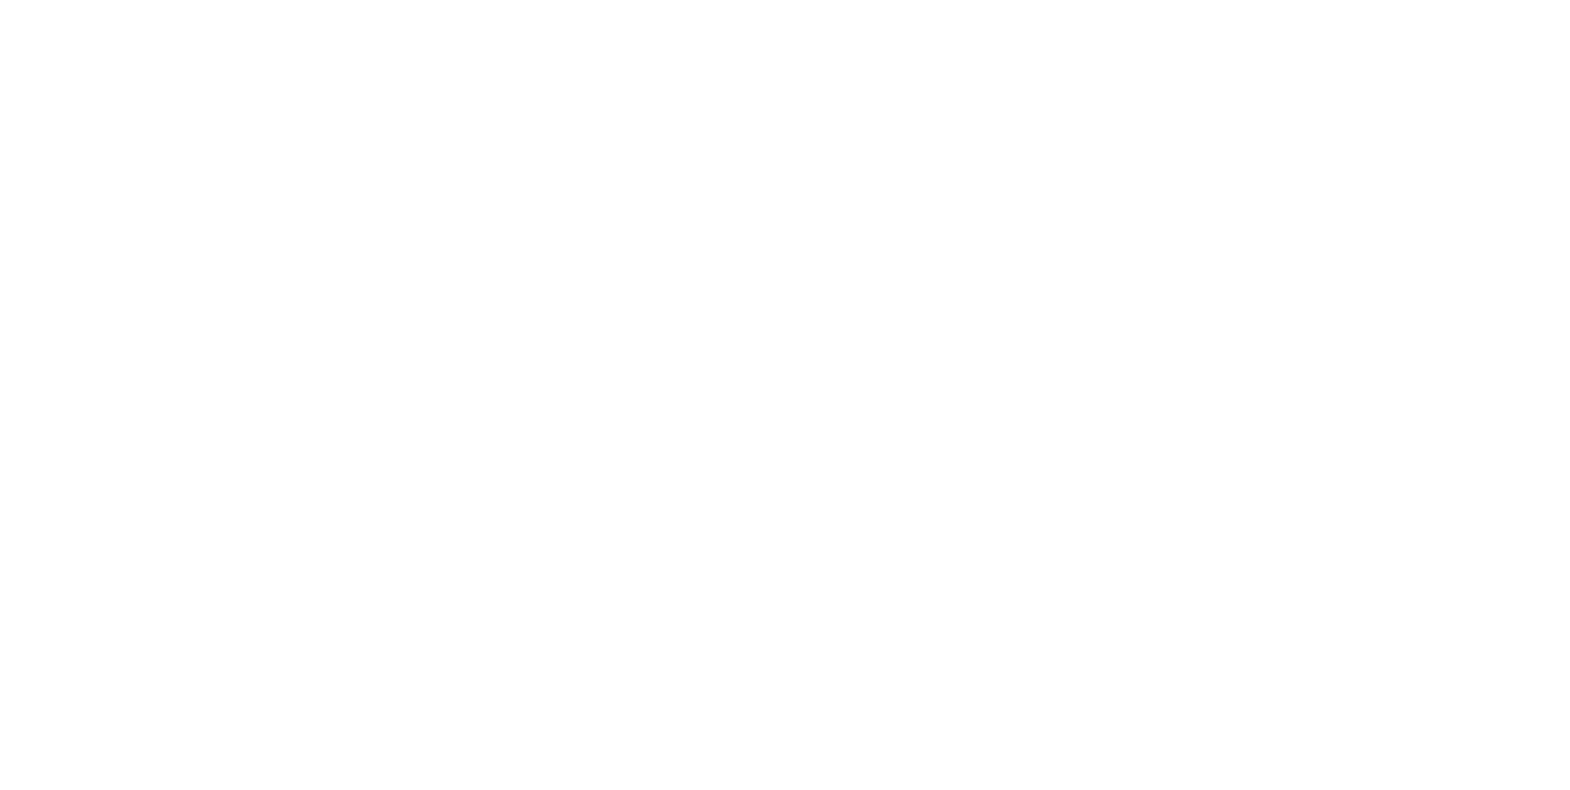

In [82]:
random_forest_classifier = RandomForestClassifier(max_depth = 3).fit(x_train, y_train)

train_score = round(random_forest_classifier.score(x_train, y_train), 5)
test_score = round(random_forest_classifier.score(x_test, y_test), 5)
results.append({"Model": "Gradient Boosting\nClassifier", "R^2 Score": train_score, "Type": "Train"})
results.append({"Model": "Gradient Boosting\nClassifier", "R^2 Score": test_score, "Type": "Test"})

visualize_decision_tree(random_forest_classifier, features, class_names)
build_confusion_matrix(random_forest_classifier, x_test, y_test)

#### Аналіз результатів

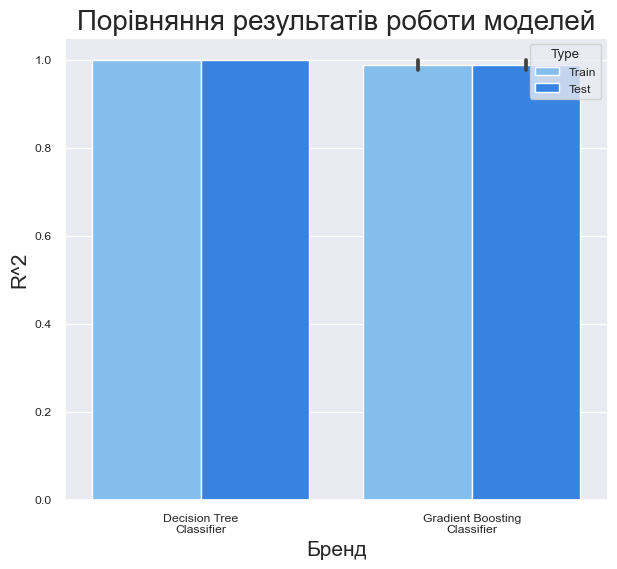

In [84]:
scores = pd.DataFrame(results, columns=["Model", "R^2 Score", "Type"])
plt.figure(figsize = (7, 6))
plt.title("Порівняння результатів роботи моделей", fontsize = 14)
sns.barplot(x = "Model", y = "R^2 Score", hue = "Type", palette = [(0.45, 0.75, 1.0), (0.1, 0.5, 1.0)], data = scores)
plt.xlabel("Бренд", fontsize = 15)
plt.ylabel("R^2", fontsize = 15)
plt.show()